# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how='left', on=["Mouse ID", "Mouse ID"], left_index=False, right_index=False)

# Display the data table for preview
#mouse_metadata.info(),study_results.info()
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_study['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicates_ID = mouse_study.loc[mouse_study.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
mouse_duplicates_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates = mouse_study.loc[mouse_study['Mouse ID'] == 'g989']
mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.loc[mouse_study['Mouse ID'] != 'g989']
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = mouse_study_clean['Mouse ID'].value_counts()
clean_mouse_count = len(clean_mouse_count)
clean_mouse_count
#type (mouse_study_clean['Mouse ID'])

248

In [7]:
# STATISTICALLY THIS SEEMS MORE ACCURATE....
moust_study_sex_statsmouse_study_clean.groupby(['Sex'])['Mouse ID'].nunique()
100 * P['Title']  / P['Title'].sum()

NameError: name 'moust_study_sex_statsmouse_study_clean' is not defined

In [8]:

clean_unique_mouse_count = mouse_study_clean(['Sex']['Mouse ID'])['Mouse ID'].unique()
clean_unique_mouse_count

TypeError: list indices must be integers or slices, not str

In [9]:
mouse_study_clean['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'z314', 'o848', 'v719', 'q597', 'c895',
      

In [10]:
#fmi# curious about the data
clean_unique_mouse_count = mouse_study_clean['Mouse ID'].unique()
clean_unique_mouse_count = clean_unique_mouse_count.groupby(['Sex','Mouse ID'])
clean_unique_mouse_sex_count = len(clean_unique_mouse_count)
clean_unique_mouse_sex_count
#mouse_study_clean.info()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mouse_study_clean.set_index(['Drug Regimen']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
tumor_volume_median = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
tumor_volume_variance = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
tumor_volume_st_dev = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
tumor_volume_SEM = mouse_study_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_stats = pd.DataFrame({
                               'Mean Tumor Volume': tumor_volume_mean,
                               'Median Tumor Volume': tumor_volume_median,
                               'Tumor Volume Variance': tumor_volume_variance,
                               'Tumor Volume Std. Dev.': tumor_volume_st_dev,
                               'Tumor Volume Std. Err.': tumor_volume_SEM,
                              })
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
#agg.info()
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
# start with one mouse...
#mouse_study_clean_ind = pd.DataFrame(mouse_study_clean.loc[mouse_study_clean['Mouse ID']=='g107',:])
#mouse_study_clean_ind

# set variables for chart needs
bar_xlabels = 'Drug Regimen'
bar_ylabels = 'Number of Timepoints'
bar_title = 'Number of Timepoints per Drug Regimen'

# include all mice
mouse_drug = mouse_study_clean.groupby('Drug Regimen')
mouse_drug_timepoint = mouse_drug[['Timepoint']].count()
mouse_drug_timepoint.head(10)

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


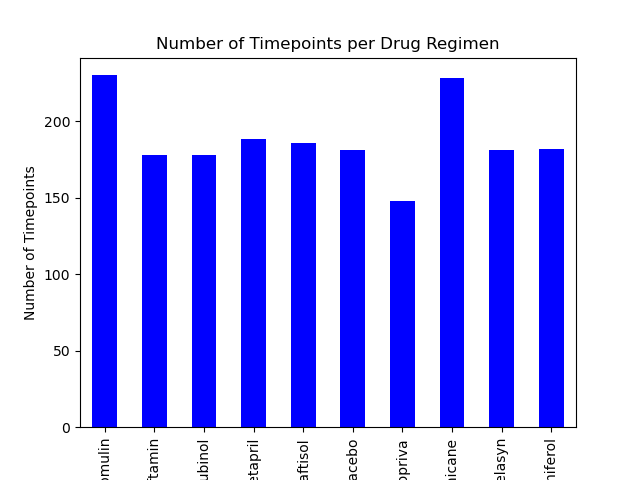

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_chart_pd = pd.DataFrame(mouse_drug_timepoint)
timepoint_chart_pd.plot(kind='bar', color='blue', legend=None, title=bar_title)

plt.xlabel(f'{bar_xlabels}')
plt.ylabel(f'{bar_ylabels}')

plt.show()


<IPython.core.display.Javascript object>


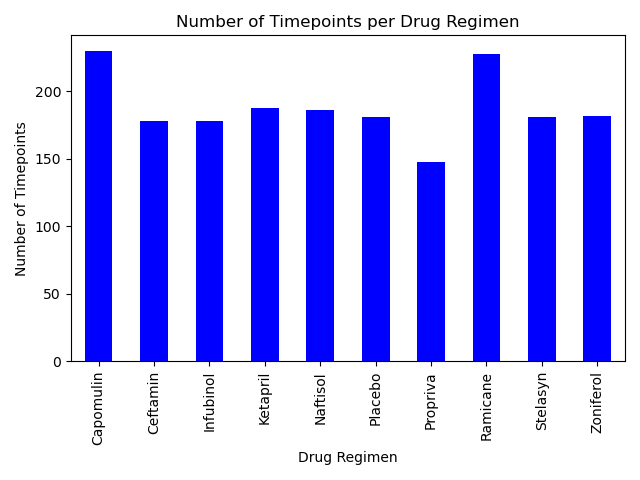

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_chart_plt = mouse_drug_timepoint.plot(kind='bar', color='blue', legend=None, title=bar_title, align='center')
timepoint_chart_plt.set_xlabel(bar_xlabels)
timepoint_chart_plt.set_ylabel(bar_ylabels)

plt.show()
plt.tight_layout()

In [ ]:
# set variables for chart needs
#b_xlabels = 'Drug Regimen'
#bar_ylabels = 'Number of Timepoints'
#bar_title = 'Number of Timepoints per Drug Regimen'






In [ ]:
#fmi# pull out gender and the id_s attached
#mouse_sex = mouse_study_clean.groupby('Sex')
#mouse_sex_number = mouse_sex[['Mouse ID']].count()
#mouse_sex_total = mouse_study_clean[['Mouse ID']].count()
#mouse_sex_percent = (round((mouse_sex_number / mouse_sex_total) * 100),2)
#mouse_sex_percent

In [17]:
# pull out gender and the id_s attached (for challenge), need this for challenge results
mouse_sex = mouse_study_clean.groupby('Sex')
mouse_sex_count = mouse_sex['Sex'].count()
# round the count
mouse_sex_percent = (round((mouse_sex_count / mouse_sex_count.sum()) * 100),2)

# display number of mice in this study with percentage calculation rounded
mouse_sex_count,mouse_sex_percent

(Sex
 Female    922
 Male      958
 Name: Sex, dtype: int64,
 (Sex
  Female    49.0
  Male      51.0
  Name: Sex, dtype: float64,
  2))

In [18]:
# STATISTICALLY this is more accurate when taking into account the number of mice involved, not the number of timepoints they are tested
# pull out sex and the UNIQUE Mouse id_s (which were treated) attached
mouse_sex_2 = mouse_study_clean.groupby(['Sex'])['Mouse ID'].nunique()
# rounding automatically defined
#mouse_sex_stats = ((mouse_sex_2 / clean_mouse_count) * 100)
mouse_sex_stats = (mouse_sex_2 / mouse_sex_2.sum() * 100)
# redefining number,  round percentages
mouse_sex_stats_2 = (round(mouse_sex_stats),2)

# display number of mice in this study with percentage calculation and rounding the percentage
print(mouse_sex_2, mouse_sex_stats, mouse_sex_stats_2)

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64 Sex
Female    49.596774
Male      50.403226
Name: Mouse ID, dtype: float64 (Sex
Female    50.0
Male      50.0
Name: Mouse ID, dtype: float64, 2)


<IPython.core.display.Javascript object>


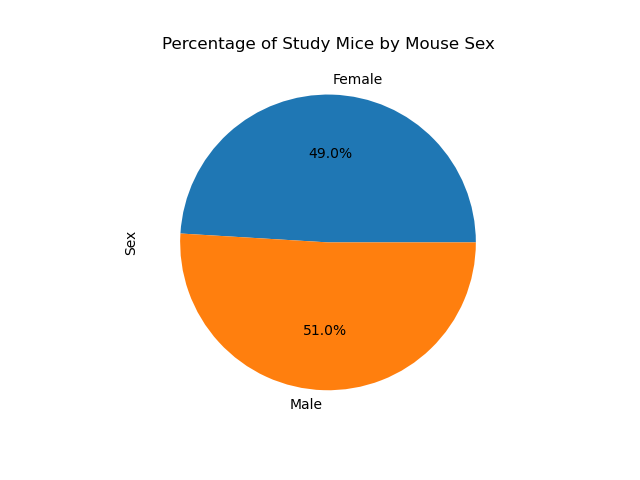

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_chart_pd = pd.DataFrame(mouse_sex_count)
mouse_sex_chart_pd.plot.pie(y='Sex', autopct="%1.1f%%", legend=None, title='Percentage of Study Mice by Mouse Sex')

#plt.figure()
#mouse_sex_percent_plot = mouse_sex_count.plot.pie(y='Sex', autopct="%1.1f%%", title='Percentage of Study Mice by Mouse Sex',figsize=(5, 5))
plt.show()

<IPython.core.display.Javascript object>


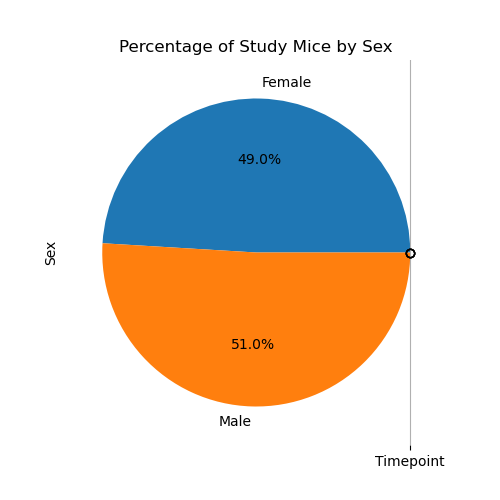

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# set x_axis
sex_idx = mouse_sex_count.index

# create pie chart
fig = plt.figure(figsize =(5, 5))
mouse_sex_percent_plt = plt.pie(mouse_sex_count, labels=sex_idx, autopct="%1.1f%%")

# set y label, title'
plt.title('Percentage of Study Mice by Sex')
plt.ylabel('Sex')

# present the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
#final_tumor_volume = mouse_study_clean.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
#final_tumor_volume

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin']
Ramicane_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ramicane']
Infubinol_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Infubinol']
Ceftamin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Ceftamin']

# Simply select the rows that were drug regimens used in the four treatment regimens being analyzed
regimens_four = pd.concat([Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data], axis=0)

# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = mouse_study_clean.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint']]
                                                 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(timepoint_last, regimens_four, left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])

# Display data for "on the right track information"
regimens_four, timepoint_last, final_volume_df

(     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
 0        b128          0           45.000000                 0    Capomulin   
 226      j246          0           45.000000                 0    Capomulin   
 227      r554          0           45.000000                 0    Capomulin   
 228      s185          0           45.000000                 0    Capomulin   
 229      b742          0           45.000000                 0    Capomulin   
 ...       ...        ...                 ...               ...          ...   
 1858     k210         45           68.923185                 3     Ceftamin   
 1862     x822         45           61.386660                 3     Ceftamin   
 1864     l733         45           64.299830                 1     Ceftamin   
 1872     o287         45           59.741901                 4     Ceftamin   
 1890     p438         45           61.433892                 1     Ceftamin   
 
          Sex  Age_months  Weight (g) 

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
for treatment in treatments:   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
   
    # add subset 
    final_tumor_volume.append(final_tumor_volume_list)

    # Calculations
    vol_mean =  final_tumor_volume.mean()
        
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)
                                            | (final_tumor_volume > upper_bound)]
    # Print the findings
    print(f'{treatment} tumor volume average is {round(vol_mean,2)}. {treatment} outliers could be above {round(upper_bound,2)} and below {round(lower_bound,2)}.')
    

Capomulin tumor volume average is 36.67. Capomulin outliers could be above 51.83 and below 20.7.
Ramicane tumor volume average is 36.19. Ramicane outliers could be above 54.31 and below 17.91.
Infubinol tumor volume average is 58.18. Infubinol outliers could be above 82.74 and below 36.83.
Ceftamin tumor volume average is 57.75. Ceftamin outliers could be above 87.67 and below 25.36.


In [62]:
## this will create a dataframe for each drug treatment
Capomulin_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Capomulin']
Ramicane_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Ramicane']
Infubinol_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Infubinol']
Ceftamin_last_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == 'Ceftamin']
## this will create a big dataframe composed of all the dfs
data = pd.concat([Capomulin_last_volume, Ramicane_last_volume, Infubinol_last_volume, Ceftamin_last_volume])

## this creates one boxplot for the first dataframe, loop through this
# regimens_four_boxplot_data(by = 'Drug Regimen', column =['Tumor Volume (mm3)']) #.iloc[:,1:5].boxplot()
## for drug in regimine....
#regimens_subset.boxplot(by = 'Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)

regimens_subset #.boxplot(by = (treatments), column = ['Tumor Volume (mm3)'], grid = False)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
45,x226,0,45.000000,0,Ceftamin,Male,23,28
46,x581,45,64.634949,3,Ceftamin,Female,19,28
47,x822,45,61.386660,3,Ceftamin,Male,3,29
48,y769,45,68.594745,4,Ceftamin,Female,6,27


In [60]:
Capomulin_last_volume, Ramicane_last_volume

(   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
 0      b128         45           38.982878                 2    Capomulin   
 1      b742         45           38.939633                 0    Capomulin   
 2      f966         20           30.485985                 0    Capomulin   
 3      g288         45           37.074024                 1    Capomulin   
 4      g316         45           40.159220                 2    Capomulin   
 5      i557         45           47.685963                 1    Capomulin   
 6      i738         45           37.311846                 2    Capomulin   
 7      j119         45           38.125164                 1    Capomulin   
 8      j246         35           38.753265                 1    Capomulin   
 9      l509         45           41.483008                 3    Capomulin   
 10     l897         45           38.846876                 1    Capomulin   
 11     m601         45           28.430964                 1   

<IPython.core.display.Javascript object>


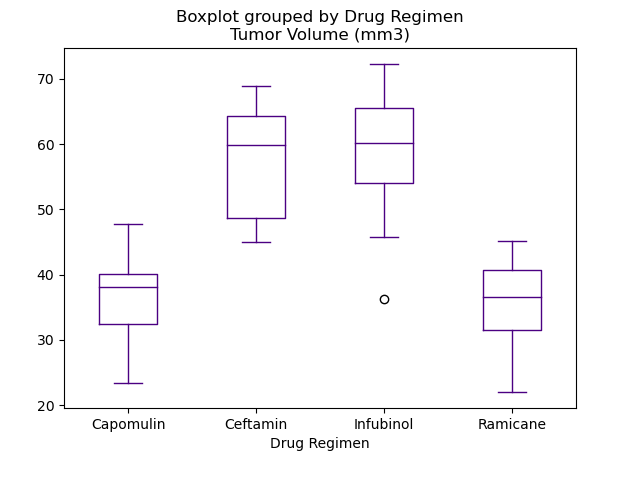

In [33]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
regimens_subset.boxplot(by = 'Drug Regimen', column =['Tumor Volume (mm3)'], grid = False, color = 'indigo')

<IPython.core.display.Javascript object>


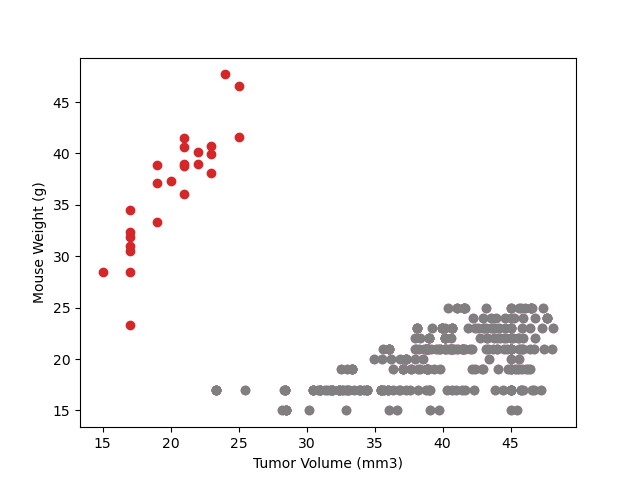

TypeError: boxplot_frame() got multiple values for argument 'column'

In [35]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, final_tumor_volume_plot = plt.subplots()
regimens_four_boxplot_data.boxplot(final_tumor_volume_list, column='Drug Regimen', color = 'indigo')

#final_tumor_plot = regimens_four_boxplot_data.iloc[:,6:4].boxplot()
plt.title = 'Tumor Volume (mm3) Distribution for each Treatment Group'
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [47]:
Capomulin_last_volume, avg_tumor_volume, mouse_weight

(   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
 0      b128         45           38.982878                 2    Capomulin   
 1      b742         45           38.939633                 0    Capomulin   
 2      f966         20           30.485985                 0    Capomulin   
 3      g288         45           37.074024                 1    Capomulin   
 4      g316         45           40.159220                 2    Capomulin   
 5      i557         45           47.685963                 1    Capomulin   
 6      i738         45           37.311846                 2    Capomulin   
 7      j119         45           38.125164                 1    Capomulin   
 8      j246         35           38.753265                 1    Capomulin   
 9      l509         45           41.483008                 3    Capomulin   
 10     l897         45           38.846876                 1    Capomulin   
 11     m601         45           28.430964                 1   

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume = Capomulin_data['Tumor Volume (mm3)']
mouse_weight = Capomulin_data['Weight (g)']
plt.scatter(avg_tumor_volume, mouse_weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

